<div style="
    background: rgba(25, 25, 25, 0.55);
    backdrop-filter: blur(16px) saturate(150%);
    -webkit-backdrop-filter: blur(16px) saturate(150%);
    border: 1px solid rgba(255, 255, 255, 0.12);
    border-radius: 18px;
    padding: 45px 30px;
    text-align: center;
    font-family: 'Inter', 'Segoe UI', 'Helvetica Neue', Arial, sans-serif;
    color: #e0e0e0;
    box-shadow: 0 0 30px rgba(0, 0, 0, 0.35);
    margin: 40px auto;
    max-width: 800px;
">

  <h1 style="
      font-size: 2.8em;
      font-weight: 700;
      margin: 0 0 8px 0;
      letter-spacing: -0.02em;
      background: linear-gradient(90deg, #00e0ff, #9c7eff);
      -webkit-background-clip: text;
      -webkit-text-fill-color: transparent;
  ">
      Machine Learning Project
  </h1>

  <h2 style="
      font-size: 1.6em;
      font-weight: 500;
      margin: 0 0 25px 0;
      color: #b0b0b0;
      letter-spacing: 0.5px;
  ">
      Cars 4 You - Predicting Car Prices
  </h2>

  <p style="
      font-size: 1.25em;
      font-weight: 500;
      color: #c0c0c0;
      margin-bottom: 6px;
  ">
      Group 5 - Lukas Belser, Samuel Braun, Elias Karle, Jan Thier
  </p>

  <p style="
      font-size: 1.05em;
      font-weight: 400;
      color: #8a8a8a;
      font-style: italic;
      letter-spacing: 0.5px;
  ">
      Machine Learning Midterm Delivery · 03.11.2025
  </p>
</div>


## **Table of Contents**
 
- [1. Import Packages and Data](#1-import-packages-and-data)  
  - [1.1 Import Required Packages](#11-import-required-packages)  
  - [1.2 Load Datasets](#12-load-datasets)  
  - [1.3 Kaggle Setup](#13-kaggle-setup)  
- [2. Data Cleaning, Feature Engineering, Split & Preprocessing](#2-data-cleaning-feature-engineering-split--preprocessing)  
  - [2.1 Data Cleaning](#21-data-cleaning)  
  - [2.2 Feature Engineering](#22-feature-engineering)  
  - [2.3 Data Split](#23-data-split)  
  - [2.4 Preprocessing](#24-preprocessing)  
- [3. Feature Selection](#3-feature-selection)  
- [4. Model Evaluation Metrics, Baselining, Setup](#4-model-evaluation-metrics-baselining-setup)  
- [5. Hyperparameter Tuning and Model Evaluation](#5-hyperparameter-tuning-and-model-evaluation)  
  - [5.1 ElasticNet](#51-elasticnet)  
  - [5.2 HistGradientBoost](#52-histgradientboost)  
  - [5.3 RandomForest](#53-randomforest)  
  - [5.4 ExtraTrees](#54-extratrees)  
- [6. Feature Importance of Tree Models (with SHAP)](#6-feature-importance-of-tree-models-with-shap)  
  - [6.1 HGB](#61-hgb)  
  - [6.2 RF](#62-rf)  
- [7. Kaggle Competition](#7-kaggle-competition)  

### 1. Import Packages and Data

#### 1.1 Import Required Packages

In [12]:
pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import joblib
import shap

from sklearn.feature_selection import VarianceThreshold, chi2, RFE
from scipy.stats import spearmanr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.base import clone
 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
 
from data_cleaning import clean_car_dataframe

#### 1.2 Load Datasets

In [16]:
df_cars_train = pd.read_csv("train.csv")
df_cars_test = pd.read_csv("test.csv")

#### 1.3 Kaggle Setup

In [17]:
# Kaggle API Connect => everyone has to do this himself, with his own kaggle.json api token

# Folder containing kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = "/Workspace/Users/20250355@novaims.unl.pt"

# Test
!echo $KAGGLE_CONFIG_DIR

/Workspace/Users/20250355@novaims.unl.pt


### 2. Data Cleaning, Feature Engineering, Split & Preprocessing

Task II (5 Points): Clean and preprocess the dataset 
- Missing Value handling, Outlier preprocessing + justify decisions -> in data_cleaning.py
- Review current features and create extra features if needed + explain -> in Feature Engineering
- Deal with categorical variables -> in One-Hot-Encoding 
- Perform data scaling, explain reasoning -> in Transforming

#### 2.1 Data Cleaning

In [18]:
# Outlier Preprocessing, Missing Value Handling and Decision justifying happens here
df_cars_train = clean_car_dataframe(df_cars_train)
df_cars_test = clean_car_dataframe(df_cars_test)


# Safety Check: print unique values of all columns of df_cars_train // df_cars_test to see if data cleaning worked and if there are still odd values
for col in df_cars_train.columns:
    print(col, df_cars_train[col].unique())
print("X"*150)
print("-"*150)
print("X"*150)
for col in df_cars_test.columns:
    print(col, df_cars_test[col].unique())

Brand ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'Hyundai' nan]
model ['golf' 'yaris' 'q2' 'fiesta' '2 series' '3 series' 'a3' 'octavia'
 'passat' 'focus' 'insignia' 'a class' 'q3' 'fabia' 'ka+' 'glc class'
 'i30' 'c class' 'polo' 'e class' 'q5' 'up' 'c-hr' 'mokka' 'corsa' 'astra'
 'tt' '5 series' 'aygo' '4 series' nan 'ecosport' 'tucson' 'x-class'
 'cl class' 'ix20' 'i20' 'a1' 'auris' 'sharan' 'adam' 'x3' 'a8'
 'gls class' 'b-max' 'a4' 'kona' 'i10' 's-max' 'x2' 'crossland x' 'tiguan'
 'a5' 'gle class' 'zafira' 'ioniq' 'a6' 'mondeo' 'yeti' 'x1' 'scala'
 's class' '1 series' 'kamiq' 'kuga' 'q7' 'gla class' 'arteon' 'sl class'
 'santa fe' 'grandland x' 'rav4' 'touran' 'corolla' 'b class' 'kodiaq'
 'v class' 'superb' 'combo life' 'beetle' 'm3' 'x4' 'ix35' 'm4' 'z4' 'x5'
 'meriva' 'verso' 'cls class' 'c-max' 'puma' 'i40' '6 series' 'karoq' 'a7'
 'land cruiser' 'edge' 'x6' '8 series' 'scirocco' 'z3' 'hilux' 'amarok'
 '7 series' 'avensis' 'm class' 'r8' 'antara' 'q8' 'x7' '

#### 2.2 Feature Engineering

**Base Feature Creation**

These are foundational features derived directly from the original data, often to create linear relationships or capture interactions.
- `age`: Calculated as `2020 - year`. Creates a simple linear feature representing the car's age. Newer cars (lower age) generally have higher prices.
- `miles_per_year`: Calculated as `mileage / age`. This normalizes the car's usage, preventing high correlation (multicollinearity) between `mileage` and `age`. A 3-year-old car with 60,000 miles is different from a 6-year-old car with 60,000 miles.
- `age_x_engine`: An interaction term `age * engineSize`. This helps the model capture non-linear relationships, such as the possibility that the value of cars with large engines might depreciate faster (or slower) than cars with small engines.
- `mpg_x_engine`: An interaction term `mpg * engineSize`. This captures the combined effect of fuel efficiency and engine power.
- `tax_per_engine`: Calculated as `tax / engineSize`. This feature represents the tax cost relative to the engine's power, which could be an indicator of overall running costs or vehicle class.
- `mpg_per_engine`: Calculated as `mpg / engineSize`. This creates an "efficiency" metric, representing how many miles per gallon the car achieves for each unit of engine size.


**Popularity & Demand Features**

These features attempt to quantify a car's popularity or market demand, which directly influences price.
- `model_freq`: Calculates the frequency (percentage) of each `model` in the training dataset. Popular, common models often have more stable and predictable pricing and demand.


**Price Anchor Features**

These features "anchor" a car's price relative to its group. They provide a strong baseline price signal based on brand, model, and configuration.
- `brand_med_price`: The median price for the car's `Brand` (e.g., the typical price for a BMW vs. a Skoda). This captures overall brand positioning.
- `model_med_price`: The median price for the car's `model` (e.g., the typical price for a 3-Series vs. a 1-Series). This captures the model's positioning within the brand.
- `brand_fuel_med_price`: The median price for the car's specific `Brand` and `fuelType` combination (e.g., a Diesel BMW vs. a Petrol BMW).
- `brand_trans_med_price`: The median price for the `Brand` and `transmission` combination (e.g., an Automatic BMW vs. a Manual BMW).


**Normalized & Relative Features**

These features compare a car to its peers rather than using absolute values.
- `*_anchor` (e.g., `brand_med_price_anchor`): Created by dividing the median price features (from section 3) by the `overall_mean_price`. This makes the feature dimensionless and represents the group's price *relative* to the entire market (e.g., "this brand is 1.5x the market average").
- `age_rel_brand`: Calculated as `age - brand_median_age`. This shows if a car is newer or older than the *typical* car for that specific brand, capturing relative age within its own group.


**CV-Safe Target Encodings**

This is an advanced technique to encode categorical variables (like `model` or `Brand`) using information from the target variable (`price`) without causing data leakage.
- `*_te` (e.g., `model_te`): Represents the *average price* for that category (e.g., the average price for a "Fiesta").
- **Why is it "CV-Safe"?** Instead of just calculating the global average price for "Fiesta" and applying it to all rows (which leaks target information), this method uses K-Fold cross-validation. For each fold of the data, the target encoding is calculated *only* from the *other* folds. This ensures the encoding for any given row never includes its own price, preventing leakage and leading to a more robust model.

In [19]:
# 1. Base Feature Creation

# Car Age: Newer cars usually have higher prices, models prefer linear features
df_cars_train['age'] = 2020 - df_cars_train['year']
df_cars_test['age']  = 2020 - df_cars_test['year']

# Miles per Year: Normalizes mileage by age (solves multicollinearity between year and mileage)
df_cars_train['miles_per_year'] = df_cars_train['mileage'] / df_cars_train['age'].replace({0: np.nan})
df_cars_train['miles_per_year'] = df_cars_train['miles_per_year'].fillna(df_cars_train['mileage'])

df_cars_test['miles_per_year'] = df_cars_test['mileage'] / df_cars_test['age'].replace({0: np.nan})
df_cars_test['miles_per_year'] = df_cars_test['miles_per_year'].fillna(df_cars_test['mileage'])

# Interaction Terms: Capture non-linear effects between engine and other numeric features
df_cars_train['age_x_engine'] = df_cars_train['age'] * df_cars_train['engineSize'].fillna(0)
df_cars_test['age_x_engine']  = df_cars_test['age']  * df_cars_test['engineSize'].fillna(0)

df_cars_train['mpg_x_engine'] = df_cars_train['mpg'].fillna(0) * df_cars_train['engineSize'].fillna(0)
df_cars_test['mpg_x_engine']  = df_cars_test['mpg'].fillna(0)  * df_cars_test['engineSize'].fillna(0)

# tax per engine
df_cars_train['tax_per_engine'] = df_cars_train['tax'] / df_cars_train['engineSize'].replace({0: np.nan})
df_cars_train['tax_per_engine'] = df_cars_train['tax_per_engine'].fillna(df_cars_train['tax'])

df_cars_test['tax_per_engine'] = df_cars_test['tax'] / df_cars_test['engineSize'].replace({0: np.nan})
df_cars_test['tax_per_engine'] = df_cars_test['tax_per_engine'].fillna(df_cars_test['tax'])

# MPG per engineSize to represent the efficiency
df_cars_train['mpg_per_engine'] = df_cars_train['mpg'] / df_cars_train['engineSize'].replace({0: np.nan})
df_cars_train['mpg_per_engine'] = df_cars_train['mpg_per_engine'].fillna(df_cars_train['mpg'])

df_cars_test['mpg_per_engine'] = df_cars_test['mpg'] / df_cars_test['engineSize'].replace({0: np.nan})
df_cars_test['mpg_per_engine'] = df_cars_test['mpg_per_engine'].fillna(df_cars_test['mpg'])


# 2. Model Frequency: Popular models tend to have stable demand and prices
model_freq = df_cars_train['model'].value_counts(normalize=True).to_dict()

df_cars_train['model_freq'] = df_cars_train['model'].map(model_freq).fillna(0.0)
df_cars_test['model_freq']  = df_cars_test['model'].map(model_freq).fillna(0.0)


# 3. Brand and Model Anchors: Represent typical price levels (positioning)
overall_mean_price = df_cars_train['price'].mean()

# Brand median price: captures brand positioning (e.g., BMW > Skoda)
brand_median_price = df_cars_train.groupby('Brand')['price'].median().to_dict()
df_cars_train['brand_med_price'] = df_cars_train['Brand'].map(brand_median_price)
df_cars_test['brand_med_price']  = df_cars_test['Brand'].map(brand_median_price)

# Model median price: captures model hierarchy within brand (e.g., 3er > 1er)
model_median_price = df_cars_train.groupby('model')['price'].median().to_dict()
df_cars_train['model_med_price'] = df_cars_train['model'].map(model_median_price)
df_cars_test['model_med_price']  = df_cars_test['model'].map(model_median_price)

# Brand × Fuel median price: different fuels have different price segments
brand_fuel_median_price = df_cars_train.groupby(['Brand','fuelType'])['price'].median().to_dict()
df_cars_train['brand_fuel_med_price'] = list(zip(df_cars_train['Brand'], df_cars_train['fuelType']))
df_cars_train['brand_fuel_med_price'] = df_cars_train['brand_fuel_med_price'].map(brand_fuel_median_price)
df_cars_test['brand_fuel_med_price']  = list(zip(df_cars_test['Brand'], df_cars_test['fuelType']))
df_cars_test['brand_fuel_med_price']  = df_cars_test['brand_fuel_med_price'].map(brand_fuel_median_price)

# Brand × Transmission median price: automatic or manual may influence resale
brand_trans_median_price = df_cars_train.groupby(['Brand','transmission'])['price'].median().to_dict()
df_cars_train['brand_trans_med_price'] = list(zip(df_cars_train['Brand'], df_cars_train['transmission']))
df_cars_train['brand_trans_med_price'] = df_cars_train['brand_trans_med_price'].map(brand_trans_median_price)
df_cars_test['brand_trans_med_price']  = list(zip(df_cars_test['Brand'], df_cars_test['transmission']))
df_cars_test['brand_trans_med_price']  = df_cars_test['brand_trans_med_price'].map(brand_trans_median_price)


# 4. Normalized Anchors (dimensionless): relative position vs overall mean
for col in ['brand_med_price','model_med_price','brand_fuel_med_price','brand_trans_med_price']:
    df_cars_train[f'{col}_anchor'] = df_cars_train[col] / overall_mean_price
    df_cars_test[f'{col}_anchor']  = df_cars_test[col]  / overall_mean_price


# 5. Relative Age (within brand): newer/older than brand median year
brand_median_age = df_cars_train.groupby('Brand')['age'].median().to_dict()

df_cars_train['age_rel_brand'] = df_cars_train['age'] - df_cars_train['Brand'].map(brand_median_age)
df_cars_test['age_rel_brand']  = df_cars_test['age']  - df_cars_test['Brand'].map(brand_median_age)


# 6. CV-Safe Target Encodings (no leakage): smooth category means # TODO: check whether this mean-target-encoding is necessary after already using features such as brand_med_price_anchor which uses the median instead of the mean
def m_estimate_mean(sum_, prior, count, m=50):
    """Posterior mean with M-estimate smoothing."""
    return (sum_ + m * prior) / (count + m)

def cv_target_encode(train_df, test_df, col, ycol='price', m=50, n_splits=5, random_state=42):
    """
    Leakage-safe KFold target encoding:
    Each fold gets encodings computed only from the remaining training folds.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    global_mean = train_df[ycol].mean()
    tr_encoded = pd.Series(index=train_df.index, dtype=float)

    # Encode training data using CV folds
    for tr_idx, val_idx in kf.split(train_df):
        tr, val = train_df.iloc[tr_idx], train_df.iloc[val_idx]
        stats = tr.groupby(col)[ycol].agg(['sum','count'])
        stats['enc'] = m_estimate_mean(stats['sum'], global_mean * stats['count'], stats['count'], m=m)
        tr_encoded.iloc[val_idx] = val[col].map(stats['enc']).fillna(global_mean)

    # Encode test data using full training statistics
    full_stats = train_df.groupby(col)[ycol].agg(['sum','count'])
    full_stats['enc'] = m_estimate_mean(full_stats['sum'], global_mean * full_stats['count'], full_stats['count'], m=m)
    te_map = full_stats['enc'].to_dict()

    te_train = tr_encoded.fillna(global_mean).astype('float32')
    te_test  = test_df[col].map(te_map).fillna(global_mean).astype('float32')

    return te_train, te_test

# Apply target encoding to categorical columns
for col, m in [('model', 100), ('Brand', 30), ('fuelType', 20), ('transmission', 20)]:
    tr_enc, te_enc = cv_target_encode(df_cars_train, df_cars_test, col, ycol='price', m=m)
    df_cars_train[f'{col}_te'] = tr_enc
    df_cars_test[f'{col}_te']  = te_enc

In [20]:
df_cars_train.columns

Index(['Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality',
       'previousOwners', 'hasDamage', 'age', 'miles_per_year', 'age_x_engine',
       'mpg_x_engine', 'tax_per_engine', 'mpg_per_engine', 'model_freq',
       'brand_med_price', 'model_med_price', 'brand_fuel_med_price',
       'brand_trans_med_price', 'brand_med_price_anchor',
       'model_med_price_anchor', 'brand_fuel_med_price_anchor',
       'brand_trans_med_price_anchor', 'age_rel_brand', 'model_te', 'Brand_te',
       'fuelType_te', 'transmission_te'],
      dtype='object')

#### 2.3 Data Split

In [21]:
# Split Data, Stratify not necessary due to regression problem and Cross Validation later
X = df_cars_train.drop(columns='price')
y = df_cars_train['price']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, 
                                                  random_state = 42, 
                                                  shuffle = True)

#### 2.4 Preprocessing

In [22]:
# Preprocessing: with sklearn Pipeline & Column Transformer

numeric_features = [
    "age", "age_rel_brand", "tax", "mpg", "engineSize", "paintQuality", "previousOwners", "model_freq",
    "brand_med_price_anchor", "model_med_price_anchor", "brand_fuel_med_price_anchor", "brand_trans_med_price_anchor",
    "age_x_engine", "mpg_x_engine",
    "model_te", "Brand_te", "fuelType_te", "transmission_te",
    "tax_per_engine", "mpg_per_engine"
]
log_features = ["mileage", "miles_per_year"] # we will test other num columns here while going on, mileage is right-skewed
categorical_features = ["Brand", "model", "transmission", "fuelType"]

# left out columns: year (age is better), hasDamage (unsure what the two values 0 and NaN mean)

def to_float_array(x):
    """Convert input to float array."""
    return np.array(x, dtype=float)

log_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handling of missing numerical values with SimpleImputer (soon to be replaced by a custom GroupMedianImputer)
    ("to_float", FunctionTransformer(to_float_array)),
    ("log", FunctionTransformer(np.log1p, validate=False)), # log1p handles zeros safely
    ("scaler", StandardScaler()) # Data Scaling with sklearn StandardScaler (we will test RobustScaler and also MinMaxScaler combined with neural networks going on)
])

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("to_float", FunctionTransformer(to_float_array)),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), # fill by mode instead of Unknown (a diesel 3er BMW is probably a diesel)
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)) # Deal with Categorical Variables with sklearn OneHotEncoder
])

# Apply the preprocessing steps to the data with ColumnTransformer
preprocessor = ColumnTransformer([
    ("log", log_transformer, log_features),
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


# Fit preprocessor on training data - avoid data leakage
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('log',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('to_float',
                                                  FunctionTransformer(func=<function to_float_array at 0x14403baf0>)),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', StandardScaler())]),
                                 ['mileage', 'miles_per_year']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('to_float',
                                                  FunctionTransforme...
                                  'brand_fuel_med_price_anchor',
                                  'brand_trans_med_price_anchor',
                                  'age_x_engine', 'mpg_x_engine', 'model_te',
                                  'Brand_te', 'fuelType_te', 'transmission_te',
                                  'tax_per_engine', 'mpg_per_engine']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Brand', 'model', 'transmission',
                                  'fuelType'])])

### 3. Feature Selection

Task III (3 Points): Define and Implement a clear and unambiguous strategy for feature selection. Use the methods **discussed in the course**. Present and justify your final selection 

Model independent Filter Methods:
- Remove constant numerical variables with VarianceThreshold
- Check highly correlated numerical variables and keep one with Spearman
- Remove unindependent categorical variables with Chi2

Model dependent Wrapper Methods:
- RFE LR / RFE SVR for linear Models: ElasticNet, SVM
- Feature Importance for tree Models: RandomForest, HistGradientBoosting (see at 6 Feature Importance (with SHAP))


In [23]:
X_train_proc = preprocessor.transform(X_train)

feature_names_all = []
for name, trans, cols in preprocessor.transformers_:
    if name != 'remainder':
        if hasattr(trans, 'get_feature_names_out'):
            # for categorical OHE
            try:
                feature_names_all.extend(trans.get_feature_names_out(cols))
            except:
                feature_names_all.extend(cols)
        else:
            feature_names_all.extend(cols)

X_df = pd.DataFrame(X_train_proc, columns=feature_names_all)


# Variance Threshold
vt = VarianceThreshold(threshold=0.0)
vt.fit(X_df)
vt_deselect = [f for f, keep in zip(feature_names_all, vt.get_support()) if not keep]
print("Features to deselect according to VarianceThreshold:", vt_deselect)


# Spearman correlation (numeric + log only)
numeric_log = numeric_features + log_features
spearman_deselect = []
for f in numeric_log:
    if f in X_df.columns:
        corr, _ = spearmanr(X_df[f], y_train)
        if abs(corr) <= 0.05:
            spearman_deselect.append(f)
print("Features to deselect according to Spearman correlation:", spearman_deselect)


# Chi2 (categorical only, must be non-negative)
cat_cols = [c for c in X_df.columns if c not in numeric_log]
X_cat = X_df[cat_cols].astype(float)
chi2_vals, _ = chi2(X_cat, y_train)
chi2_deselect = [f for f, val in zip(cat_cols, chi2_vals) if val <= 0]
print("Features to deselect according to Chi²:", chi2_deselect)


Features to deselect according to VarianceThreshold: []
Features to deselect according to Spearman correlation: ['paintQuality', 'previousOwners']
Features to deselect according to Chi²: []


In [24]:
# Numeric/log features for linear models
linear_numeric_features = [f for f in numeric_features + log_features if f not in spearman_deselect]

preprocessor_linear = ColumnTransformer([
    ("num", numeric_transformer, linear_numeric_features),
    ("cat", categorical_transformer, categorical_features)
], remainder="drop")

# => use preprocessor_linear for linear model setup; since tree models are indifferent to irrelevant features

### 4. Model Evaluation Metrics, Baselining, Setup

TASK IV (4 Points): Build a simple model and assess the performance
- Identify the type of problem and select the relevant algorithms
- Select one Model Assessment Strategy to use throughout your work. Which metrics are you using to evaluate your model and why?


=> Tip from lecturer: Use RandomSearch instead of GridSearchCV, set a wider Range


In [25]:
# Model evaluation metrics used throughout this analysis:
#
#   > MAE: Mean Absolute Error - average absolute deviation between predicted and true car prices
#          Easy to interpret in pounds, same metric used by Kaggle competition
#   > RMSE: Root Mean Squared Error - sensitive to outliers, helps identify large prediction errors  
#   > R²: Coefficient of determination - proportion of variance explained by the model
#         1.0 = perfect predictions, 0.0 = same as predicting mean, < 0.0 = worse than mean
#
# These metrics are appropriate for regression problems predicting continuous variables (car prices)

def print_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) 
    r2 = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.4f} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

In [26]:
# Absolute basic baselining with the mean and median

mean_pred = y_train.mean()
median_pred = y_train.median()

print("baseline mean predictor: ")
print_metrics(y_val, [mean_pred]*len(y_val))
# MAE: 6976.3626 | RMSE: 92839550.2849 | R2: -0.0000

print("-"*150)

print("baseline median predictor: ") 
print_metrics(y_val, [median_pred]*len(y_val))
# MAE: 6751.1604 | RMSE: 97557866.6363 | R2: -0.0508

baseline mean predictor: 
MAE: 6949.2397 | RMSE: 9544.0803 | R2: -0.0001
------------------------------------------------------------------------------------------------------------------------------------------------------
baseline median predictor: 
MAE: 6714.2387 | RMSE: 9774.3098 | R2: -0.0489


In [27]:
# Models Setup (inkl. Prepro in Pipeline)

### LINEAR MODEL

# ElasticNet
elastic_pipe = Pipeline([
    ("preprocess", preprocessor_linear),
    ("model", ElasticNet(
        alpha=0.01,            # mild regularization to stabilize if many features
        l1_ratio=0.5,          # balanced L1/L2, can grid-search
        max_iter=30000,        # allow more convergence iterations
        tol=1e-4,              # stricter tolerance often improves accuracy
        selection="cyclic",    # usually converges faster than random
        random_state=42
    ))
])


### TREE MODELS

# HistGradientBoostingRegressor: modern and very fast, handles missing values natively (no imputation needed!). often matches or beats XGBoost/LightGBM 
hgb_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", HistGradientBoostingRegressor(
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=20,
        l2_regularization=0.5, # regularize slightly to prevent overfit, > 0.5 does not seem to work
        random_state=42  
    ))
])


# RandomForestRegressor: excellent general baseline ensemble, handles non-linearities well, doesn’t overfit easily but can be slow for large data
rf_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_split=3,
        min_samples_leaf=2,
        max_features="sqrt",
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ))
])

# ExtraTreesRegressor: similar to RandomForest but with more randomization => often better generalization
et_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", ExtraTreesRegressor(
        n_estimators=400,          
        max_depth=None,
        min_samples_leaf=2,
        max_features="sqrt",
        bootstrap=False,
        n_jobs=-1,
        random_state=42
    ))
])


### 5. Hyperparameter Tuning and Model Evaluation

After a first runs for all of these models, we decided to focus on RandomForest and in particular on HistGradientBoost for the best prediction performance for now.

##### 5.1 ElasticNet

In [22]:
# Hyperparameter Tuning: ElasticNet

elastic_param_grid = {
    "model__alpha": [0.001],    #   tried 0.0001 to 0.5
    "model__l1_ratio": [0.9]    #   tried 0.1 to 0.9  
}

elastic_grid = RandomizedSearchCV(
    elastic_pipe,
    param_distributions=elastic_param_grid,
    n_iter=1,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

elastic_grid.fit(X_train, y_train)
elastic_best = elastic_grid.best_estimator_
elastic_val_pred = elastic_best.predict(X_val)


print("ElasticNet Results: ")
print_metrics(y_val, elastic_val_pred)
print("Best ElasticNet params:", elastic_grid.best_params_)

# ElasticNet Results: 
# MAE: 2375.8878 | RMSE: 3667.4444 | R2: 0.8523
# Best ElasticNet params: {'model__l1_ratio': 0.9, 'model__alpha': 0.001}

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_m

ElasticNet Results: 
MAE: 2395.1082 | RMSE: 3707.4120 | R2: 0.8491
Best ElasticNet params: {'model__l1_ratio': 0.9, 'model__alpha': 0.001}


/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [26]:
# ElasticNet + RFE (no CV)
# reuse the tuned ElasticNet from the best pipeline
en_base = clone(elastic_best.named_steps["model"])
 
rfe_pipe_linear = Pipeline([
    ("preprocess", preprocessor_linear),
    ("rfe", RFE(
        estimator=en_base,
        n_features_to_select=100,
        step=0.1,              # remove ~10% of features per iteration
        importance_getter="auto"
    )),
    ("model", clone(en_base))
])
 
# train / predict / evaluate
rfe_pipe_linear.fit(X_train, y_train)
val_pred_linear_rfe = rfe_pipe_linear.predict(X_val)
 
print("ElasticNet with RFE (no CV):")
print_metrics(y_val, val_pred_linear_rfe)
 
# show which features were removed
rfe = rfe_pipe_linear.named_steps["rfe"]
feat_names = (
    linear_numeric_features +
    list(rfe_pipe_linear.named_steps["preprocess"]
         .named_transformers_["cat"].named_steps["encoder"]
         .get_feature_names_out(categorical_features))
)
removed = [n for n, keep in zip(feat_names, rfe.support_) if not keep]

print(f"\nRemoved Features ({len(removed)}):")
for feat in removed:
    print(f"  - {feat}")

ElasticNet with RFE (no CV):
MAE: 2534.8478 | RMSE: 3851.6933 | R2: 0.8371

Removed Features (53):
  - age
  - age_rel_brand
  - tax
  - model_freq
  - brand_fuel_med_price_anchor
  - brand_trans_med_price_anchor
  - mpg_x_engine
  - model_te
  - Brand_te
  - fuelType_te
  - transmission_te
  - tax_per_engine
  - mpg_per_engine
  - miles_per_year
  - Brand_BMW
  - model_a class
  - model_auris
  - model_avensis
  - model_aygo
  - model_b-max
  - model_beetle
  - model_c-hr
  - model_cl class
  - model_cls class
  - model_e class
  - model_ecosport
  - model_fiesta
  - model_focus
  - model_glb class
  - model_ioniq
  - model_ix20
  - model_ka+
  - model_kuga
  - model_m class
  - model_m3
  - model_m6
  - model_passat
  - model_puma
  - model_q8
  - model_sl class
  - model_touran
  - model_verso
  - model_x6
  - model_yaris
  - transmission_Automatic
  - transmission_Manual
  - transmission_Other
  - transmission_Semi-Auto
  - transmission_Unknown
  - fuelType_Diesel
  - fuelType_Elec

/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eliaskarle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


**Reasoning**: We used 100 features as an initial, arbitrary cutoff for feature selection in the ElasticNet model. Preliminary experiments and insights from the EDA (see separate notebook) indicated that tree-based methods are likely to perform better. Therefore, we prioritized feature selection for the tree-based models based on SHAP values.
 

##### 5.2 HistGradientBoost

In [28]:
# Define a function to use it here and potentially use it later for a final hyperparameter tuning after feature selection again
def hgb_hyperparameter_tuning(hgb_estimator, n_iter):
    # hgb_param_dist_old = {
    #     "model__learning_rate": uniform(0.01, 0.09),       # samples values
    #     "model__max_leaf_nodes": randint(20, 120),         # tries between 20–120 leaves
    #     "model__min_samples_leaf": randint(2, 20),         # samples leaf sizes between 2–20
    #     "model__max_iter": randint(400, 1000),             # tries 400–1000 iterations
    #     "model__l2_regularization": uniform(0.0, 1.0)      # samples small regularization values
    # }

    # optimized the parameter distributions based on previous runs to focus search space
    hgb_param_dist = {
        "model__learning_rate": [0.06389789198396824],
        "model__max_leaf_nodes": [105],
        "model__min_samples_leaf": [3],
        "model__max_iter": [642],
        "model__l2_regularization": [0.942853570557981],
        "model__early_stopping": [True],
        "model__validation_fraction": [0.1],
        "model__n_iter_no_change": [20],
        "model__random_state":[42]
    }
    

    cv = KFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold for faster runtime

    # Randomized search setup
    hgb_random = RandomizedSearchCV(
        estimator=hgb_estimator,
        param_distributions=hgb_param_dist,
        n_iter=n_iter,                         # number of random combinations to try
        scoring="neg_mean_absolute_error",     # optimize for MAE (primary metric)
        cv=cv,
        n_jobs=-1,
        random_state=42,
        verbose=3
    )

    # Fit the search
    hgb_random.fit(X_train, y_train)
    return hgb_random

In [29]:
hgb_random = hgb_hyperparameter_tuning(hgb_pipe, n_iter=1) 
# Get best model
hgb_best = hgb_random.best_estimator_
print("Best Params:", hgb_random.best_params_)

# Evaluate on validation set
hgb_val_pred = hgb_random.best_estimator_.predict(X_val)
print_metrics(y_val, hgb_val_pred)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 2/3] END model__early_stopping=True, model__l2_regularization=0.942853570557981, model__learning_rate=0.06389789198396824, model__max_iter=642, model__max_leaf_nodes=105, model__min_samples_leaf=3, model__n_iter_no_change=20, model__random_state=42, model__validation_fraction=0.1;, score=-1325.382 total time=  17.1s
[CV 3/3] END model__early_stopping=True, model__l2_regularization=0.942853570557981, model__learning_rate=0.06389789198396824, model__max_iter=642, model__max_leaf_nodes=105, model__min_samples_leaf=3, model__n_iter_no_change=20, model__random_state=42, model__validation_fraction=0.1;, score=-1343.327 total time=  17.4s
[CV 1/3] END model__early_stopping=True, model__l2_regularization=0.942853570557981, model__learning_rate=0.06389789198396824, model__max_iter=642, model__max_leaf_nodes=105, model__min_samples_leaf=3, model__n_iter_no_change=20, model__random_state=42, model__validation_fraction=0.1;, score=-135

##### 5.3 RandomForest

In [30]:
# Hyperparameter Tuning: RandomForest

# Old parameter distribution
# rf_param_dist_old = {
#     "model__n_estimators": randint(200, 600),        # number of trees
#     "model__max_depth": randint(5, 40),              # depth of each tree
#     "model__min_samples_split": randint(2, 10),      # min samples to split an internal node
#     "model__min_samples_leaf": randint(1, 8),        # min samples per leaf
#     "model__max_features": ["sqrt", "log2"],         # feature sampling strategy
#     "model__bootstrap": [True, False]                # use bootstrapping or not
# }

# So far best parameter distribution based on previous runs to focus search space
rf_param_dist = {
    "model__n_estimators": [467],        
    "model__max_depth": [32],              
    "model__min_samples_split": [9],      
    "model__min_samples_leaf": [1],        
    "model__max_features": ["sqrt"],         
    "model__bootstrap": [False]                
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Randomized search setup
rf_random = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=rf_param_dist,
    n_iter=1,                         # reduced number of random combinations to 1 because of fixed set after previous runs
    scoring="neg_mean_absolute_error", 
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the search
rf_random.fit(X_train, y_train)

# Best model
rf_best_rand = rf_random.best_estimator_
print("Best Params:", rf_random.best_params_)

# Evaluate on validation set
rf_val_pred = rf_best_rand.predict(X_val)
print_metrics(y_val, rf_val_pred)

# Save best model
# joblib.dump(rf_best_rand, "rf_best.pkl")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END model__bootstrap=False, model__max_depth=32, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=9, model__n_estimators=467; total time=  13.3s
[CV] END model__bootstrap=False, model__max_depth=32, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=9, model__n_estimators=467; total time=  13.3s
[CV] END model__bootstrap=False, model__max_depth=32, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=9, model__n_estimators=467; total time=  13.3s
Best Params: {'model__n_estimators': 467, 'model__min_samples_split': 9, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 32, 'model__bootstrap': False}
MAE: 1309.7450 | RMSE: 2120.2701 | R2: 0.9506


##### 5.4 ExtraTrees

In [ ]:
# Hyperparameter Tuning: ExtraTrees

# Old parameter distribution
# et_param_dist_old = {
#     "model__n_estimators": randint(200, 600),
#     "model__max_depth": randint(5, 40),
#     "model__min_samples_split": randint(2, 10),
#     "model__min_samples_leaf": randint(1, 8),
#     "model__max_features": ["sqrt", "log2"],
#     "model__bootstrap": [True, False]
# }

# So far best parameter distribution based on previous runs to focus search space
et_param_dist = {
    "model__n_estimators": [467],
    "model__max_depth": [32],
    "model__min_samples_split": [9],
    "model__min_samples_leaf": [1],
    "model__max_features": ["sqrt"],
    "model__bootstrap": [False]
}

et_random = RandomizedSearchCV(
    estimator=et_pipe,
    param_distributions=et_param_dist,
    n_iter=30,
    scoring="neg_mean_absolute_error",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

et_random.fit(X_train, y_train)

et_best = et_random.best_estimator_
print("ExtraTrees Best Params:", et_random.best_params_)

et_val_pred = et_best.predict(X_val)
print_metrics(y_val, et_val_pred)

# joblib.dump(et_best, "et_best.pkl")

### 6. Feature Importance of Tree Models (with SHAP)

  **Problem:** Current feature selection targets linear models
  (ElasticNet), but we primarily use tree-based models (HGB,
  RandomForest).

  **Solution:** Use SHAP (SHapley Additive exPlanations) to
  identify feature importance specifically for tree models

  **Why SHAP for Trees:**
  - Provides exact feature importance values for tree-based
  models
  - Tree models handle irrelevant features, but noise features
  still impact performance
  - Enables data-driven selection rather than statistical filter
  methods

In [ ]:
# Function to compute SHAP-based feature importance for any tree model
def calculate_shap_values(best_pipeline, X_train, log_features, numeric_features, categorical_features, sample_size=1000, seed=42, label=None):
    '''
    We use SHAP's TreeExplainer to calculate feature importance values. TreeExplainer is specifically optimized for tree-based models and provides exact Shapley values efficiently.
    '''
    # Preprocess training data with the pipeline’s preprocessor
    pre = best_pipeline.named_steps["preprocess"]
    X_train_proc = pre.transform(X_train)

    # Build feature names in ColumnTransformer order: log, numeric, one-hot(cat)
    cat_names = pre.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(categorical_features)
    feature_names_all = list(log_features) + list(numeric_features) + list(cat_names)

    # SHAP for tree models
    model = best_pipeline.named_steps["model"]
    explainer = shap.TreeExplainer(model)

    # Sample for speed, reproducible
    rng = np.random.default_rng(seed)
    n = min(sample_size, len(X_train_proc))
    idx = rng.choice(len(X_train_proc), n, replace=False)

    shap_values = explainer.shap_values(X_train_proc[idx])
    importance = np.abs(shap_values).mean(axis=0)

    shap_df = (pd.DataFrame({"feature": feature_names_all, "importance": importance})
               .sort_values("importance", ascending=False)
               .reset_index(drop=True))

    tag = label or model.__class__.__name__
    print(f"\nTop 20 most important features ({tag}):")
    print(shap_df.head(20).to_string(index=False))

    return shap_df, feature_names_all, X_train_proc


In [ ]:
# General function which can be called by the models to avoid redundant code and enable easy maintenance
def train_model_on_best_features(baseline_mae, shap_importance, model, X_train_processed, X_val_processed, range_number_of_features, feature_names_all):
    '''
    We systematically test different numbers of top features to find the optimal subset:
    We train the model with the same optimized hyperparameters but using only the most important features identified by SHAP
    '''
    # Track best model
    results = []
    best_model = None
    best_mae = float("inf")
    best_n = None
    best_features = None

    # Find best feature counts
    for n_features in range_number_of_features:
        # Select top N features
        top_features = shap_importance.head(n_features)["feature"].tolist()
        feature_indices = [i for i, fname in enumerate(feature_names_all) if fname in top_features]

        X_train_subset = X_train_processed[:, feature_indices]
        X_val_subset   = X_val_processed[:, feature_indices]

        # Train and predict using selected amount of features (model uses tuned hyperparams)
        model.fit(X_train_subset, y_train)
        pred_subset = model.predict(X_val_subset)
        mae_subset = mean_absolute_error(y_val, pred_subset)
        results.append({"n_features": n_features, "mae": mae_subset})

        # Check whether current mae is best so far
        if mae_subset < best_mae:
            best_mae = mae_subset
            best_n = n_features
            best_model = model
            best_features = top_features

        # Print MAE for each amount of features
        if n_features in range_number_of_features:
            improvement_rf = baseline_mae - mae_subset
            print(f"Top {n_features:3d} features: MAE: {mae_subset:.1f} (Δ: {improvement_rf:+.1f})")


    print(f"\nOptimal feature selection results:")
    print(f"Best performance with {best_n} features: MAE: {best_mae:.2f}")
    print(f"Improvement over baseline: {baseline_mae - best_mae:+.2f} MAE\n")

    print(f"Optimal {best_n} features for production model:")
    for i, feat in enumerate(best_features, start=1):
        imp = shap_importance.loc[shap_importance['feature'] == feat, 'importance'].values[0]
        print(f"{i:2d}. {feat:25s} ({imp:.1f})")
    
    # Retrain a fresh final estimator on the full training set restricted to best_features (guarantees correct input dimension)
    selected_idx = [i for i, fname in enumerate(feature_names_all) if fname in best_features]
    final_est = clone(model)
    final_est.fit(X_train_processed[:, selected_idx], y_train)

    return final_est, best_features

In [34]:
def plot_top_shap(shap_df, model_name, top_k=20):
    top_df = shap_df.head(top_k).iloc[::-1]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(top_df["feature"], top_df["importance"], color="#4C72B0")
    ax.set_xlabel("Average |SHAP| value")
    ax.set_title(f"Top {top_k} {model_name} features by SHAP")
    plt.tight_layout()
    plt.show()


#### 6.1 HGB

##### Step 1: Baseline Performance with Optimized Hyperparameters

In [35]:
X_val_processed_hgb = hgb_best.named_steps["preprocess"].transform(X_val)
hgb_val_pred = hgb_best.named_steps["model"].predict(X_val_processed_hgb)
n_features_total = X_val_processed_hgb.shape[1]
baseline_mae_hgb = mean_absolute_error(y_val, hgb_val_pred)

print("Baseline Performance of HGB model after Hyperparameter Tuning:\n")
print_metrics(y_val, hgb_val_pred)
print(f"\nTotal features used: {n_features_total}")

Baseline Performance of HGB model after Hyperparameter Tuning:

MAE: 1308.7354 | RMSE: 2082.3987 | R2: 0.9524

Total features used: 155


##### Step 2: SHAP Feature Importance Analysis

In [36]:
#function
shap_importance_df_hgb, feature_names_all_hgb, X_train_processed_hgb = calculate_shap_values(
    hgb_best, X_train, log_features, numeric_features, categorical_features,
    sample_size=1000, seed=42, label="HGB"
)


Top 20 most important features (HGB):
                     feature  importance
brand_trans_med_price_anchor 2871.075161
                         age 2192.438411
      model_med_price_anchor 1866.222134
                  engineSize 1355.794353
                     mileage 1127.891477
              mpg_per_engine  532.073660
                         mpg  412.860741
               age_rel_brand  241.052635
      brand_med_price_anchor  200.925334
              miles_per_year  189.903475
 brand_fuel_med_price_anchor  170.584609
                mpg_x_engine  149.567279
             transmission_te  128.407803
                         tax  110.573493
              tax_per_engine  107.674531
                  model_freq  106.069952
                age_x_engine   84.134729
             fuelType_Hybrid   76.773884
                    model_te   55.163900
                    Brand_te   48.906529


##### Step 3: Automated Feature Selection Optimization

In [43]:
# Define model with the same hyperparams
hgb_model = hgb_best.named_steps["model"]
hgb_selected = HistGradientBoostingRegressor(**hgb_model.get_params())

# Number of top SHAP features to try
range_number_of_features_hgb = range(17, 19)

# Train/evaluate on subsets of top features
best_model_hgb, best_features_hgb = train_model_on_best_features(
    baseline_mae_hgb, shap_importance_df_hgb,
    hgb_selected,
    X_train_processed_hgb, X_val_processed_hgb,
    range_number_of_features_hgb,
    feature_names_all_hgb
)

Top  17 features: MAE: 1268.4 (Δ: +40.3)
Top  18 features: MAE: 1279.0 (Δ: +29.8)

Optimal feature selection results:
Best performance with 17 features: MAE: 1268.40
Improvement over baseline: +40.34 MAE

Optimal 17 features for production model:
 1. brand_trans_med_price_anchor (2871.1)
 2. age                       (2192.4)
 3. model_med_price_anchor    (1866.2)
 4. engineSize                (1355.8)
 5. mileage                   (1127.9)
 6. mpg_per_engine            (532.1)
 7. mpg                       (412.9)
 8. age_rel_brand             (241.1)
 9. brand_med_price_anchor    (200.9)
10. miles_per_year            (189.9)
11. brand_fuel_med_price_anchor (170.6)
12. mpg_x_engine              (149.6)
13. transmission_te           (128.4)
14. tax                       (110.6)
15. tax_per_engine            (107.7)
16. model_freq                (106.1)
17. age_x_engine              (84.1)


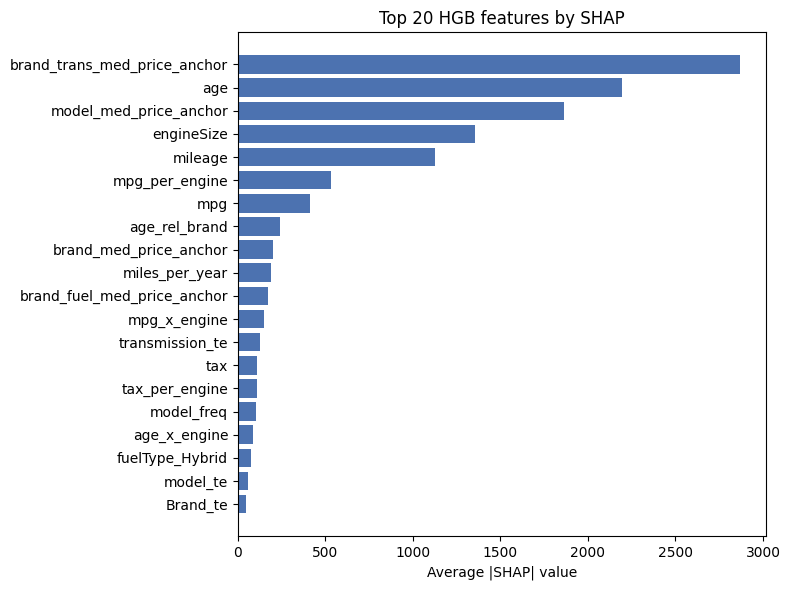

In [ ]:
# HGB SHAP bar plot
plot_top_shap(shap_importance_df_hgb, "HGB", top_k=20)

In [ ]:
# Build the final pipeline with feature selection included
def select_best_features(X):
    idx = [i for i, fname in enumerate(feature_names_all) if fname in best_features_hgb]
    return X[:, idx]

hgb_final_pipe = Pipeline([
    ("preprocess", hgb_best.named_steps["preprocess"]),
    ("feature_selector", FunctionTransformer(select_best_features, validate=False)),
    ("model", best_model_hgb)
])

# Save the best model for later use
joblib.dump(hgb_final_pipe, "hgb_best_feature.pkl")

#### 6.2 RF

##### Step 1: Baseline Performance with Optimized Hyperparameters

In [39]:
# Use the tuned RF pipeline (rf_best_rand) and compute baseline on the validation set
X_val_processed_rf = rf_best_rand.named_steps["preprocess"].transform(X_val)
rf_val_pred = rf_best_rand.named_steps["model"].predict(X_val_processed_rf)
n_features_total_rf = X_val_processed_rf.shape[1] # TODO cant we just use one val_processed and one n_features_total or why did we split that? ~J
baseline_mae_rf = mean_absolute_error(y_val, rf_val_pred)

print("Baseline Performance of RF model after Hyperparameter Tuning:\n")
print_metrics(y_val, rf_val_pred)
print(f"\nTotal features used: {n_features_total_rf}")

Baseline Performance of RF model after Hyperparameter Tuning:

MAE: 1309.7450 | RMSE: 2120.2701 | R2: 0.9506

Total features used: 155


##### Step 2: SHAP Feature Importance Analysis

In [40]:
shap_importance_df_rf, feature_names_all_rf, X_train_processed_rf = calculate_shap_values(
    rf_best_rand, X_train, log_features, numeric_features, categorical_features,
    sample_size=100, seed=42, label="RF"
)


Top 20 most important features (RF):
                     feature  importance
                         age 1244.258485
               age_rel_brand  938.580873
      model_med_price_anchor  856.048924
                  engineSize  763.820915
                     mileage  732.123423
brand_trans_med_price_anchor  686.678736
             transmission_te  559.585731
      brand_med_price_anchor  537.458494
 brand_fuel_med_price_anchor  518.333452
              mpg_per_engine  486.722041
                    Brand_te  468.503834
         transmission_Manual  465.411781
                         mpg  430.336194
                age_x_engine  430.081340
                         tax  397.228908
                  model_freq  243.107301
              miles_per_year  240.144940
                    model_te  196.400149
      transmission_Semi-Auto  178.376961
              tax_per_engine  162.403526


##### Step 3: Automated Feature Selection Optimization

In [41]:
# Use the same processed validation data and reuse tuned RF hyperparameters
rf_params = {k.replace("model__", ""): v for k, v in rf_random.best_params_.items()}
rf_selected = RandomForestRegressor(random_state=42, n_jobs=-1, **rf_params)
range_number_of_features_rf = range(26, 28) # We set this to a smaller range for more efficiency after first iterations

best_model_rf, best_features_rf = train_model_on_best_features(baseline_mae_rf, shap_importance_df_rf, rf_selected, X_train_processed_rf, X_val_processed_rf, range_number_of_features_rf, feature_names_all_rf)

Top  26 features: MAE: 1267.7 (Δ: +42.1)
Top  27 features: MAE: 1267.2 (Δ: +42.5)

Optimal feature selection results:
Best performance with 27 features: MAE: 1267.24
Improvement over baseline: +42.51 MAE

Optimal 27 features for production model:
 1. age                       (1244.3)
 2. age_rel_brand             (938.6)
 3. model_med_price_anchor    (856.0)
 4. engineSize                (763.8)
 5. mileage                   (732.1)
 6. brand_trans_med_price_anchor (686.7)
 7. transmission_te           (559.6)
 8. brand_med_price_anchor    (537.5)
 9. brand_fuel_med_price_anchor (518.3)
10. mpg_per_engine            (486.7)
11. Brand_te                  (468.5)
12. transmission_Manual       (465.4)
13. mpg                       (430.3)
14. age_x_engine              (430.1)
15. tax                       (397.2)
16. model_freq                (243.1)
17. miles_per_year            (240.1)
18. model_te                  (196.4)
19. transmission_Semi-Auto    (178.4)
20. tax_per_engine       

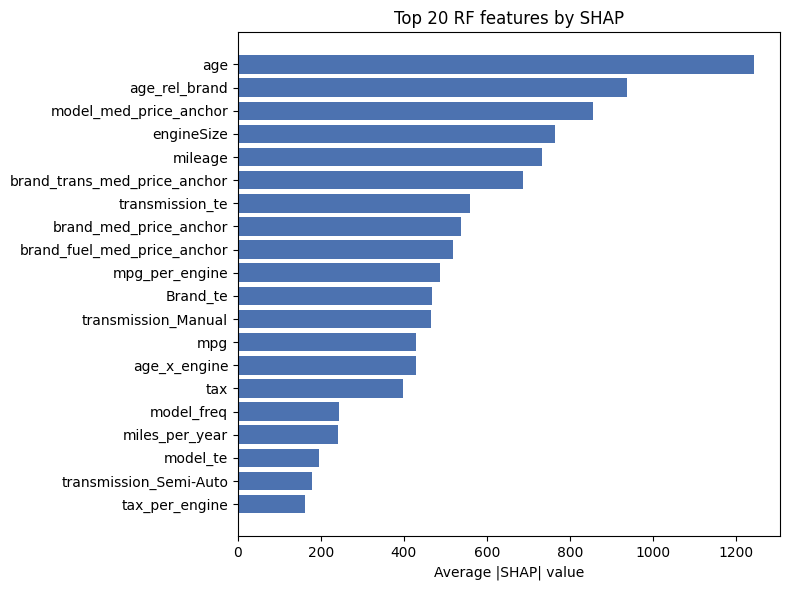

In [42]:
# RF SHAP bar plot
plot_top_shap(shap_importance_df_rf,  "RF",  top_k=20)

In [ ]:
# Save the best RF model for later use

# Build the final RF pipeline with feature selection included
def select_best_features_rf(X):
    idx = [i for i, fname in enumerate(feature_names_all_rf) if fname in best_features_rf]
    return X[:, idx]

final_rf_pipe = Pipeline([
    ("preprocess", rf_best_rand.named_steps["preprocess"]),
    ("feature_selector", FunctionTransformer(select_best_features_rf, validate=False)),
    ("model", best_model_rf)
])

# joblib.dump(final_rf_pipe, "rf_best_feature.pkl")

### 7. Kaggle Competition

Extra Task (1 Point): Be in the Top 5 Groups on Kaggle

In [ ]:
# Load best model from Joblib
hgb_best_99 = joblib.load("hgb_best_feature.pkl")

# Visualize preprocessor
preprocessor = hgb_best_99.named_steps["preprocess"]
display(preprocessor)

# Use the loaded model to predict on val set
pred_loaded = hgb_best_99.predict(X_val)
mae_loaded = mean_absolute_error(y_val, pred_loaded)
print(f"Loaded model MAE on validation set: {mae_loaded:.2f}")

# Predict on test set
df_cars_test['price'] = hgb_best_99.predict(df_cars_test)
df_cars_test['price'].to_csv('Group05_Version06.csv', index=True)

In [ ]:
# !kaggle competitions submit -c cars4you -f Group05_Version05.csv -m "Message" # Uncomment to submit to Kaggle

In [ ]:
!kaggle competitions submissions -c cars4you